**Artificial Neural Network - MNIST Dataset application**
1.   Business Problem
2.   Data Understanding
3.   Data Preparation
4.   Modeling
5.   Evulition

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print("Shape" , x_train.shape, y_train.shape)

Shape (60000, 28, 28) (60000,)


In [6]:
print("Shape" , x_test.shape, y_test.shape)

Shape (10000, 28, 28) (10000,)


In [7]:
num_labels = len(np.unique(y_train))
num_labels

10

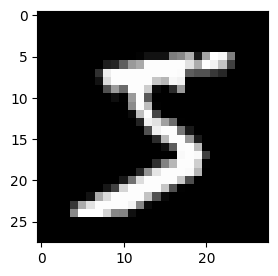

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.show()

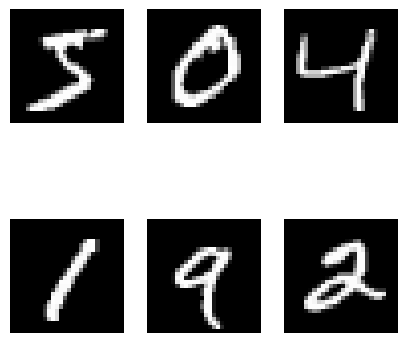

In [9]:
plt.figure(figsize=(5,5))
for n in range(6):
  ax = plt.subplot(2,3,n+1)
  plt.imshow(x_train[n], cmap='gray')
  plt.axis('off')

# **Define a function for automation process**

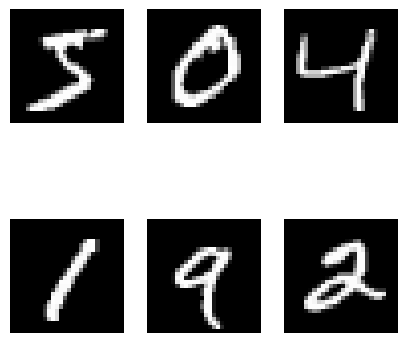

In [10]:
def visualize_img(data):
  plt.figure(figsize=(5,5))
  for n in range(6):
    ax = plt.subplot(2,3,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

visualize_img(x_train)

In [11]:
x_train[1].shape

(28, 28)

In [12]:
x_train[1][5]  # 1.görseldeki 5.indexteki matris

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [13]:
x_train[1][10,10]  # gray

238

In [14]:
x_train[1][14,10]  # black

0

In [15]:
x_train[1].mean()

39.661989795918366

In [16]:
x_train[1][15:20 , 15:20]

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   7, 135],
       [  0,   0,   7, 131, 252],
       [  0,  48, 165, 252, 173],
       [114, 238, 253, 162,   0]], dtype=uint8)

In [17]:
x_train[1][15:20 , 15:20].mean()

77.48

# **Matrix Display and Pixel Annotation**

In [18]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  ax.imshow(data, cmap='gray')
  width, height = data.shape

  threshold = data.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(data[x,y], xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if data[x,y]<threshold else 'black')

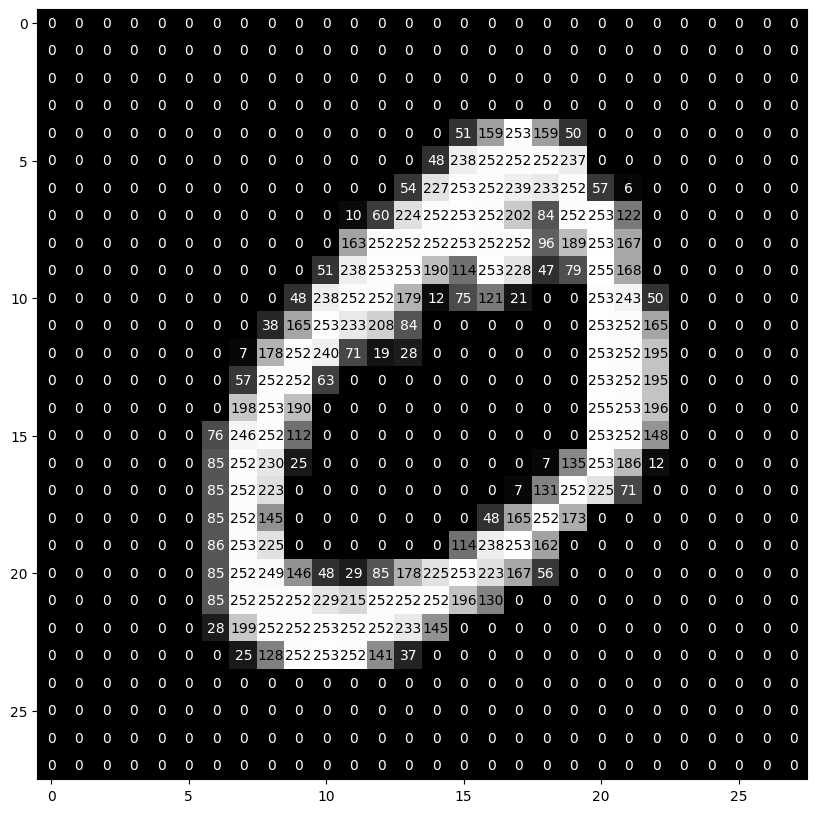

In [19]:
visualize_img(x_train[1])

In [20]:
x_train[1][15,6]

76

# **Data Preparation**


1.   Encoding
2.   Reshaping
3.   Normalization

**Encoding**

In [21]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
# encoding for target
# list = [0,1,2,3,4,5,6,7,8,9]
# encoded_list = [0,0,1,0,0,0,0,0,0,0]  # encoded for 2
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**Reshaping**


*   x_train.shape[0]: Görsel sayısını temsil eder (60000)
*   x_train.shape[1]: Görselin yüksekliğini temsil eder (28)
*   x_train.shape[2]: Görselin genişliğini temsil eder (28)
*   1: Görselin renk kanalını temsil eder. MNIST gibi gri tonlama
     görselleri için,her pikselde 1 kanal vardır (renkli görsellerde ise genellikle 3 kanal olur: kırmızı, yeşil, mavi)

In [24]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [25]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [26]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Normalization**
* verilerin belirli bir aralığa (genellikle 0 ile 1 arasında) ölçeklendirilmesi işlemidir.
* /255 : her bir pikselin değerini 255'e bölerek 0 ile 1 arasında bir değere dönüştürür.


In [27]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# **Modeling**

In [28]:
# Model Definition
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation='relu', name="layer1"),
    Dense(units=num_labels,activation="softmax",name="output_layer")])

# Model Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8260 - loss: 0.6276 - precision: 0.9354 - recall: 0.7012 - val_accuracy: 0.9448 - val_loss: 0.1910 - val_precision: 0.9584 - val_recall: 0.9341
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9506 - loss: 0.1761 - precision: 0.9634 - recall: 0.9390 - val_accuracy: 0.9613 - val_loss: 0.1374 - val_precision: 0.9714 - val_recall: 0.9533
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9647 - loss: 0.1246 - precision: 0.9721 - recall: 0.9577 - val_accuracy: 0.9633 - val_loss: 0.1224 - val_precision: 0.9706 - val_recall: 0.9576
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9726 - loss: 0.0943 - precision: 0.9782 - recall: 0.9675 - val_accuracy: 0.9703 - val_loss: 0.0971 - val_precision: 0.9755 - val_recall: 0.9663
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9777 - loss: 0.0763 - precision: 0.9822 - recall: 0.9739 - val_accuracy: 0.9731 - val_loss: 0.0878 

# **Evaluation**

In [31]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9831 - loss: 0.0606 - precision: 0.9862 - recall: 0.9797 - val_accuracy: 0.9751 - val_loss: 0.0842 - val_precision: 0.9788 - val_recall: 0.9721
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9859 - loss: 0.0501 - precision: 0.9882 - recall: 0.9835 - val_accuracy: 0.9754 - val_loss: 0.0775 - val_precision: 0.9780 - val_recall: 0.9728
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9871 - loss: 0.0438 - precision: 0.9895 - recall: 0.9849 - val_accuracy: 0.9780 - val_loss: 0.0741 - val_precision: 0.9800 - val_recall: 0.9760
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9904 - loss: 0.0349 - precision: 0.9921 - recall: 0.9890 - val_accuracy: 0.9769 - val_loss: 0.0771 - val_precision: 0.9796 - val_recall: 0.9755
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9926 - loss: 0.0290 - precision: 0.9937 - recall: 0.9911 - val_accuracy: 0.9782 - val_loss: 0.

**Accuracy and Loss Graphs**

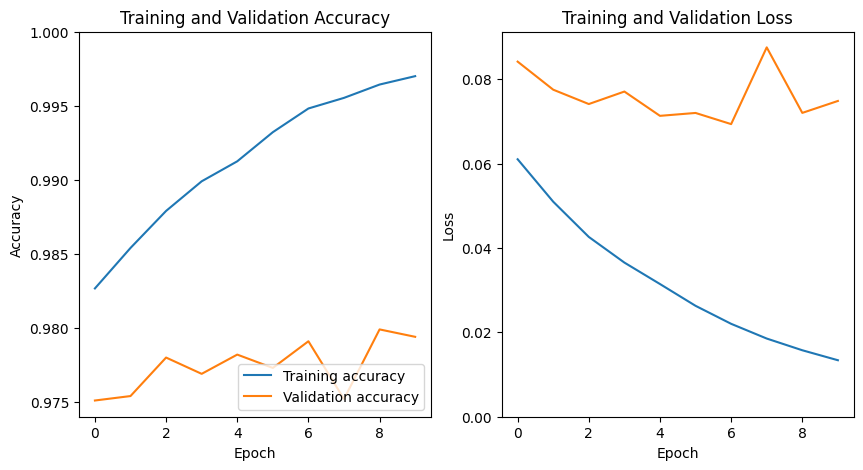

In [32]:
# accuracy

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend(loc="lower right")
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [33]:
loss, precision, recall, accuracy = model.evaluate(x_test, y_test)

print("Test loss: %.1f%%" % (loss * 100))
print("Test accuracy: %.1f%%" % (accuracy * 100))
print("Test precision: %.1f%%" % (precision * 100))
print("Test recall: %.1f%%" % (recall * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0869 - precision: 0.9772 - recall: 0.9741
Test loss: 7.5%
Test accuracy: 97.9%
Test precision: 98.1%
Test recall: 97.8%


# **Prediction**

In [34]:
model.save('mnist_model.h5')  # HDF5 (Hierarchical Data Format version 5)
# modelin tüm yapılandırması, ağırlıkları, optimizasyon durumu ve diğer bilgileri mnist_model.h5 dosyasına kaydedilir.

In [44]:
import random
random_index = random.randint(0, x_test.shape[0]-1)
print(random_index)

1997


In [45]:
y_test[random_index]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

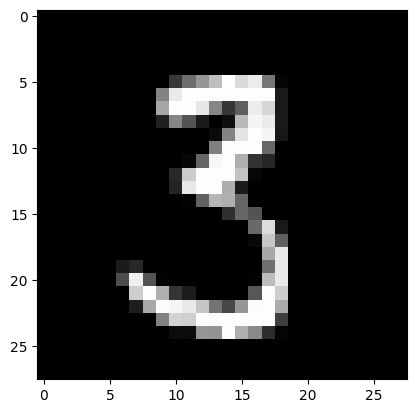

In [46]:
test_image = x_test[random_index]
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [48]:
test_data = test_image.reshape(1,28,28,1)
# [batch_size, height, width, channels]
# 1: Model, bir örnek (batch) alacak şekilde veriyi yeniden şekillendiriyor.

In [53]:
prob = model.predict(test_data)
print(prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[2.3084290e-09 1.1432284e-09 7.3963946e-08 9.9999726e-01 3.3916595e-13
  9.1045121e-07 5.8643488e-15 2.7378520e-13 1.5526147e-06 1.7425137e-07]]


In [56]:
predicted_classes = np.argmax(prob)
print(predicted_classes)

# np.argmax: En büyük olasılık değerinin bulunduğu indeksi döndürür.

3


In [58]:
print(f"predicted class: {predicted_classes}")
print(f"actual classes: {np.argmax(y_test[random_index])}")
print(f"predicted probability: {prob}")

predicted class: 3
actual classes: 3
predicted probability: [[2.3084290e-09 1.1432284e-09 7.3963946e-08 9.9999726e-01 3.3916595e-13
  9.1045121e-07 5.8643488e-15 2.7378520e-13 1.5526147e-06 1.7425137e-07]]


In [59]:
predicted_class = np.argmax(prob)
confidence = prob[0][predicted_class] * 100

print(f"predicted classes: {predicted_class}")
print(f"predicted confidence: {confidence:.2f}%")

predicted classes: 3
predicted confidence: 100.00%
